# Random Forest

## O que são?

Os modelos Random Forest são uma junção de várias árvores de decisão. São responsáveis por dividir a base de dados em vários subconjuntos, cada subconjunto contém uma amostra de observações e de variáveis independentes escolhidas aleatoriamente. Com cada subconjunto é construída uma nova árvore. Ao final são utilizados os resultados de todas as árvores para prever um valor, essa decisão pode ser feita levando em consideração a média dos resultados de saída (para valores numéricos) ou qual valor aparece mais vezes (classificação).

## Exemplo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Classificação

In [21]:
# importando
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification #Gerar classes aleatórias 
from sklearn.tree import DecisionTreeClassifier

In [22]:
#Cria 1000 exemplos com 4 variáveis independentes, saída 1 ou 0
X, y = make_classification(n_samples=1500, n_features=4, shuffle=True) 

#Dividindo dados em treino e teste utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
#criando modelo

#n_estimators = número de árvores --- oob_score = Se os dados não utilizados no conjunto de trino serão usados para avaliar as árvores
#bootstrap = Se o conjunto original será dividido em subconjuntos (True) ou se todas árvores treinarão com o mesmo conjunto (False)
#max_samples = quantas colunas serão utilizadas (# máximo) em cada subconjunto. int, float ou None, None = todas

rf_clf = RandomForestClassifier(max_samples = 2, oob_score=True, bootstrap = True, random_state = 0, n_estimators=100)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

sc_rf = rf_clf.score(X_test, y_test)
print(sc_rf)

0.88


In [61]:
#Criando árvore de classificação para comparar

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

sc_clf = clf.score(X_test, y_test)
print(sc_clf)

0.84


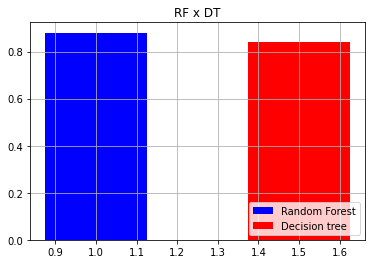

In [72]:
plt.figure(figsize=(6,4))
plt.bar(1, sc_rf, width=0.25, color='blue', label='Random Forest')
plt.bar(1.5, sc_clf, width=0.25, color ='red', label ='Decision tree')

plt.title('RF x DT')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

### Regressão

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

In [86]:
#Gera regressão com valores aleatórios, 1000 linhas e 4 colunas além da variável alvo
X, y = make_regression(n_samples = 1000, n_features = 4, shuffle = True, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [104]:
reg = RandomForestRegressor(bootstrap=True, oob_score=True, random_state=0, n_estimators=300)
reg.fit(X_train, y_train)

sc_reg = reg.score(X_test, y_test)
print(sc_reg)

0.9408137457310597


In [109]:
#Criando árvore para comparação
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train,y_train)

tr_sc = tree_reg.score(X_test,y_test)
print(tr_sc)

0.8130359109783356


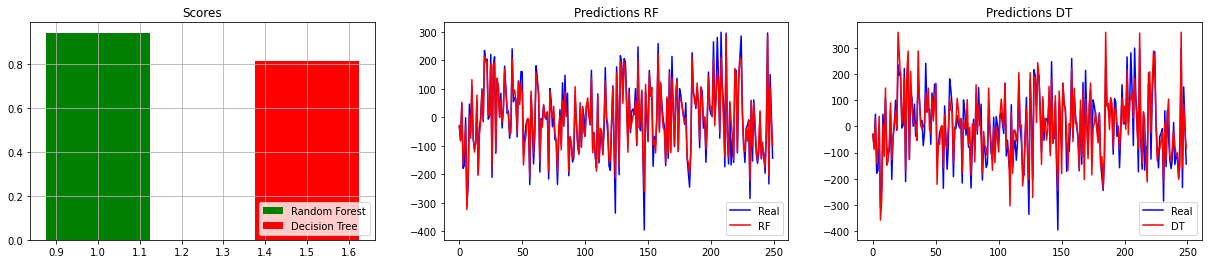

In [118]:
ix, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(21,4))

ax[0].bar(1, sc_reg, width=0.25, color='green', label='Random Forest')
ax[0].bar(1.5, tr_sc, width=0.25, color='red', label='Decision Tree')
ax[0].set_title('Scores')
ax[0].legend(loc = 'lower right')
ax[0].grid()

ax[1].plot(y_test, color='blue',label='Real')
ax[1].plot(reg.predict(X_test), color='red', label='RF')
ax[1].set_title('Predictions RF')
ax[1].legend()

ax[2].plot(y_test, color='blue',label='Real')
ax[2].plot(tree_reg.predict(X_test), color='red', label='DT')
ax[2].set_title('Predictions DT')
ax[2].legend()

In [124]:
from sklearn.metrics import mean_squared_error as mse

rf_error = mse(y_test, reg.predict(X_test), squared=False)
dt_error = mse(y_test, tree_reg.predict(X_test), squared=False)

print(rf_error, dt_error)

31.71425967731395 56.36678297260118


### Aplicando Random Forest em dados temporais 

In [125]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 1, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

In [157]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,10)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9
9,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002,78.449997
10,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002
11,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002
12,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002
13,77.650002,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000


In [158]:
#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4','Close 5','Close 6','Close 7','Close 8','Close 9']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [162]:
#Criando modelo
reg = RandomForestRegressor(bootstrap=True, oob_score=True, random_state=0, n_estimators=100)
reg.fit(X_train, Y_train)
reg_pred = reg.predict(X)

print(reg.score(X_test, Y_test))

0.969769581230212


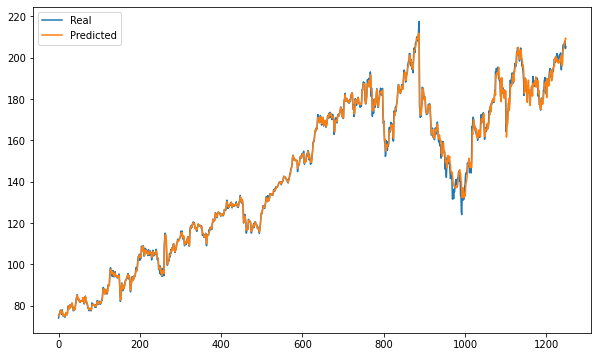

In [165]:
plt.figure(figsize=(10,6))
plt.plot(Y, label='Real')
plt.plot(reg_pred, label='Predicted')
plt.legend()
plt.show()